In [5]:
%matplotlib inline
%config InlineBackend.figure_formats = ['svg']
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

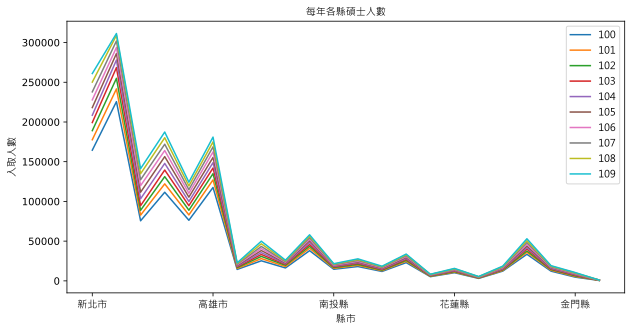

In [33]:
df = pd.read_csv(r"C:\Users\user\Downloads\_w110111722492696031969921-c0110405.csv")

# 資料拆分
df["year"] = df["15歲以上大專以上人口數"].apply(lambda x : x.split("/")[0].replace("年",""))
df["city"] = df["15歲以上大專以上人口數"].apply(lambda x : x.split("/")[1].replace(" ",""))
df["gender"] = df["15歲以上大專以上人口數"].apply(lambda x : x.split("/")[2])

# 資料清理
df = df.drop([0,1,2],axis=0)
df = df.reset_index(drop=True)
df = df.drop(df[df.city==df.city.unique()[-1]].index,axis=0)
df = df[df.index%3==0]

# 年分 區域 碩士數量
new_df = df[["year","city","研究所(含博士班)"]]

# 臺北市每年研究所成長
taipei = new_df[new_df.city=="臺北市"]
font  = FontProperties(fname=r"D:\_Python coding\Python evn\practice\Lib\site-packages\matplotlib\mpl-data\fonts\ttf\msjh.ttc")

df_ = pd.DataFrame(columns=range(100,109,1) ,index = new_df.city.unique())

for year in new_df.year.unique():
    df_[int(year)] = np.array(new_df[new_df.year==year]["研究所(含博士班)"])
df_.astype(float)
df.index.name = "city"
chart = df_.plot(figsize=(10,5))
    
for label in chart.get_xticklabels():
    label.set_fontproperties(font)
    
plt.title("每年各縣碩士人數",fontproperties=font)
plt.xlabel("縣市",fontproperties=font)
plt.ylabel("入取人數",fontproperties=font)
plt.legend(prop=font)
plt.show()

df_.to_excel(r"D:\desktop\每年各縣碩士人數.xlsx")